#### Student Name: Mai Ngo
#### Course Name and Number: DSC 478 Programming Machine Learning Applications
#### Assignment 3
#### Date: 5/21/2023

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import preprocessing

a. Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. For this problem you do not need to normalize or standardize the data. However, you may need to handle missing values by imputing those values based on variable means. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for the variables in the data set. Separate the target attribute for regression. Use scikit-learn to create a 20%-80% randomized split of the data. Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.

#### Load data, generate descriptive stats, handle missing valye by replacing mean. 

In [2]:
comData = pd.read_csv('communities.csv')
print (f"Data shape: {comData.shape}")
print (f"Column names: {comData.columns}")
#Read data as Pandas dataframe and get number of rows and columns, column names, and data types. 

Data shape: (1994, 100)
Column names: Index(['state', 'communityname', 'population', 'householdsize', 'racepctblack',
       'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21',
       'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban',
       'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
       'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap',
       'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade',
       'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
       'PctEmplManu', 'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids',
       'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
       'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig',
   

In [3]:
comData.head(10)

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
5,6,SouthPasadenacity,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,...,0.0,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.14
6,44,Lincolntown,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,...,0.0,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.03
7,6,Selmacity,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,...,0.0,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.55
8,21,Hendersoncity,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,...,0.0,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.53
9,29,Claytoncity,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,...,0.0,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.15


In [4]:
comData.describe(include="all").T
#Generate descriptive statistics for all variables. 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,1994.0,NaN,NaN,NaN,28.683551,16.397553,1.0,12.0,34.0,42.0,56.0
communityname,1994,1828,Greenvillecity,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,1994.0,NaN,NaN,NaN,0.057593,0.126906,0.0,0.01,0.02,0.05,1.0
householdsize,1994.0,NaN,NaN,NaN,0.463395,0.163717,0.0,0.35,0.44,0.54,1.0
racepctblack,1994.0,NaN,NaN,NaN,0.179629,0.253442,0.0,0.02,0.06,0.23,1.0
...,...,...,...,...,...,...,...,...,...,...,...
PctSameState85,1994.0,NaN,NaN,NaN,0.65153,0.198221,0.0,0.56,0.7,0.79,1.0
LandArea,1994.0,NaN,NaN,NaN,0.065231,0.109459,0.0,0.02,0.04,0.07,1.0
PopDens,1994.0,NaN,NaN,NaN,0.232854,0.203092,0.0,0.1,0.17,0.28,1.0
PctUsePubTrans,1994.0,NaN,NaN,NaN,0.161685,0.229055,0.0,0.02,0.07,0.19,1.0


In [5]:
comData.info()
#Check missing values and data types. Looks like there is no missing value so far?
#Categorical attributes: 'communityname' and 'OtherPerCap': object data type. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1994 non-null   int64  
 1   communityname          1994 non-null   object 
 2   population             1994 non-null   float64
 3   householdsize          1994 non-null   float64
 4   racepctblack           1994 non-null   float64
 5   racePctWhite           1994 non-null   float64
 6   racePctAsian           1994 non-null   float64
 7   racePctHisp            1994 non-null   float64
 8   agePct12t21            1994 non-null   float64
 9   agePct12t29            1994 non-null   float64
 10  agePct16t24            1994 non-null   float64
 11  agePct65up             1994 non-null   float64
 12  numbUrban              1994 non-null   float64
 13  pctUrban               1994 non-null   float64
 14  medIncome              1994 non-null   float64
 15  pct

In [6]:
comData['OtherPerCap']

0       0.36
1       0.22
2       0.28
3       0.36
4       0.51
        ... 
1989    0.36
1990    0.23
1991    0.22
1992    0.27
1993    0.25
Name: OtherPerCap, Length: 1994, dtype: object

In [7]:
#Tried to convert 'OtherPerCap' to data type float and received this error: could not convert string to float: '?'.
comData.loc[comData['OtherPerCap']=='?']
#Found one observation with misisng value. 
comData['OtherPerCap'].replace('?', np.nan, inplace=True)

#Replace the missing value with NaN
comData['OtherPerCap'] = comData['OtherPerCap'].astype(float)
#Convert to float data type and calculate the variable mean. 
meanOtherPerCap = round(comData['OtherPerCap'].dropna().mean(),2)    
print (f"OtherPerCap mean: {meanOtherPerCap}")

#Replace missing value with variable mean.
comData['OtherPerCap'].fillna(meanOtherPerCap, inplace=True)

OtherPerCap mean: 0.28


#### Separate the target attribute. Use scikit-learn to create a 20%-80% randomized split of the data.

In [8]:
#Based on communities-descr.txt file, target attribute is ViolentCrimesPerPop.
target = comData['ViolentCrimesPerPop']
#Remove state and communityname as not predictive attributes.
predictors = comData.drop(columns=['ViolentCrimesPerPop', 'state', 'communityname'])
print (f"Target shape: {target.shape}")
print (f"Predictors shape: {predictors.shape}")

Target shape: (1994,)
Predictors shape: (1994, 97)


In [9]:
from sklearn.model_selection import train_test_split
trainSet, testSet, trainTarget, testTarget = train_test_split(predictors, target, test_size=0.2, random_state=33)
print(trainSet.shape)
trainSet[0:5]

(1595, 97)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
1184,0.01,0.54,0.02,0.91,0.27,0.04,0.37,0.41,0.25,0.28,...,0.01,0.00,0.29,0.42,0.72,0.74,0.62,0.01,0.20,0.47
401,0.99,0.42,0.59,0.44,0.11,0.11,0.44,0.56,0.37,0.39,...,0.30,0.12,0.14,0.71,0.52,0.79,0.75,0.28,0.55,0.62
1864,0.01,0.53,0.02,0.95,0.15,0.03,0.27,0.37,0.18,0.23,...,0.01,0.00,0.17,0.54,0.38,0.24,0.51,0.11,0.03,0.09
1390,0.07,0.41,0.02,0.97,0.05,0.02,0.32,0.49,0.31,0.44,...,0.00,0.00,0.13,0.88,0.76,0.74,0.84,0.05,0.27,0.40
1066,0.05,0.41,0.11,0.85,0.23,0.03,0.32,0.52,0.26,0.10,...,0.00,0.00,0.17,0.33,0.20,0.23,0.05,0.09,0.12,0.01


In [10]:
print(testSet.shape)
testSet[0:5]

(399, 97)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
1158,0.00,0.46,0.01,0.97,0.09,0.04,0.40,0.26,0.20,0.49,...,0.00,0.00,0.18,0.13,0.73,0.76,0.55,0.04,0.06,0.03
1079,0.01,0.35,0.01,0.96,0.04,0.04,0.32,0.45,0.29,0.62,...,0.00,0.00,0.11,0.86,0.66,0.88,0.80,0.03,0.11,0.01
1633,0.51,0.31,0.60,0.46,0.06,0.09,0.42,0.54,0.39,0.48,...,0.17,0.01,0.13,0.80,0.61,0.87,0.84,0.12,0.68,0.75
1700,0.02,0.52,0.25,0.63,0.03,0.31,0.54,0.62,0.44,0.36,...,0.01,0.00,0.13,0.72,0.35,0.50,0.70,0.13,0.04,0.01
1956,0.03,0.37,0.40,0.68,0.03,0.01,0.39,0.47,0.34,0.55,...,0.01,0.01,0.03,0.78,0.59,0.71,0.69,0.06,0.10,0.00


b. Perform standard multiple linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE values on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation on the training partition and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection). Note if you cannot get the book's version of linear regression working, use scikit-learn Linear Regression instead for a 3pt deduction)

In [11]:
def standRegres(x, y):
    '''Apply standard multiple linear regression based on the code from Ch. 8 of Machine Learning in Action.'''
    xMat = np.mat(x)
    yMat = np.mat(y).T
    #Convert predictors (x) and target (y) into matrix form. Transpose y for dot product. 
    
    xTx = xMat.T*xMat
    #Matrix multiplication of x transpose by x.
    
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    coEf = xTx.I * (xMat.T * yMat)
    #(X^T * X)^(-1) * X^T * y
    return coEf

In [12]:
coEf = standRegres(trainSet,trainTarget)
print(coEf)

[[-0.03009925]
 [-0.04872718]
 [ 0.24797629]
 [-0.0176407 ]
 [ 0.00296747]
 [ 0.09081445]
 [ 0.16203168]
 [-0.05323783]
 [-0.23150461]
 [ 0.17193046]
 [-0.11223052]
 [ 0.04009871]
 [-0.19458068]
 [-0.1486629 ]
 [ 0.04422363]
 [-0.03341436]
 [ 0.04452918]
 [ 0.04008593]
 [-0.07824651]
 [ 0.33747275]
 [ 0.06939384]
 [-0.3258196 ]
 [-0.02774196]
 [-0.04064277]
 [ 0.03538526]
 [ 0.04612305]
 [ 0.03939722]
 [ 0.26757963]
 [-0.20261636]
 [-0.0168442 ]
 [-0.02358128]
 [ 0.09519842]
 [ 0.02823329]
 [ 0.26004561]
 [-0.05030497]
 [-0.03681525]
 [ 0.40581335]
 [ 0.23089272]
 [ 0.13293255]
 [-0.40065306]
 [-0.17035387]
 [-0.0155528 ]
 [-0.18838277]
 [-0.03885841]
 [-0.00577495]
 [ 0.01054521]
 [-0.16073045]
 [-0.24283701]
 [ 0.16691424]
 [-0.11245861]
 [ 0.01019721]
 [ 0.04992291]
 [-0.19943973]
 [ 0.14425289]
 [-0.03391334]
 [-0.26895829]
 [ 0.70216558]
 [-0.42751199]
 [ 0.06530132]
 [-0.13179974]
 [ 0.05789865]
 [-0.27163246]
 [ 0.58885604]
 [ 0.08478805]
 [-0.17991854]
 [-0.7379011 ]
 [ 0.19036

#### Compute RMSE on 80% training data.

In [13]:
#Convert to numpy arrays, calculating prediction values. 
trainSet_Mat=np.mat(trainSet)
trainTarget_Mat=np.mat(trainTarget)
predTrain = trainSet_Mat * coEf

#Using RMSE formula. Get the difference between predicted and actual value. 
error = trainTarget_Mat.T - predTrain
#Calculate sum of squared errors.
sum_squared_errors = np.square(error).sum()
#Divided by total number of observations.
RMSE_Train = np.sqrt(sum_squared_errors / len(predTrain))
print(f'RMSE on Train Data (manually): {RMSE_Train:.4f}')

RMSE on Train Data (manually): 0.1264


In [14]:
#Double check.
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmseTrain = np.sqrt(mean_squared_error(predTrain, trainTarget_Mat.T))
print(f'RMSE on Train Data (scikit-learn): {rmseTrain:.4f}')

RMSE on Train Data (scikit-learn): 0.1264


#### Plots.

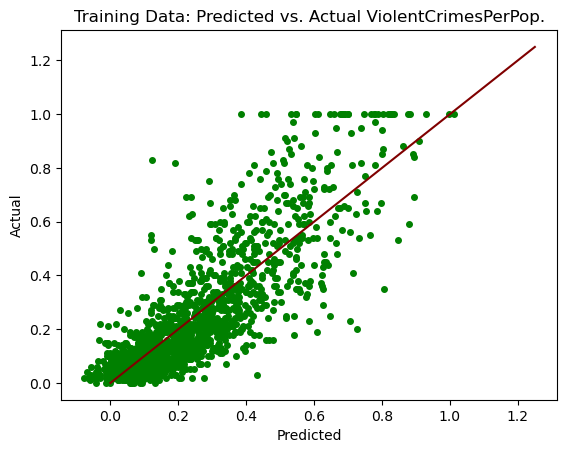

In [15]:
#Plot predicted against actual (in the training data).
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.array(predTrain), trainTarget, 'go', markersize=4)
plt.plot([0, 1.25], [0, 1.25], 'maroon')
plt.title('Training Data: Predicted vs. Actual ViolentCrimesPerPop.')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
#Matching regression coefficients to each predictor. 
for i in range(len(predictors.columns)):
    print("%7s   %2.2f" % (predictors.columns[i], coEf[i]))

population   -0.03
householdsize   -0.05
racepctblack   0.25
racePctWhite   -0.02
racePctAsian   0.00
racePctHisp   0.09
agePct12t21   0.16
agePct12t29   -0.05
agePct16t24   -0.23
agePct65up   0.17
numbUrban   -0.11
pctUrban   0.04
medIncome   -0.19
pctWWage   -0.15
pctWFarmSelf   0.04
pctWInvInc   -0.03
pctWSocSec   0.04
pctWPubAsst   0.04
pctWRetire   -0.08
medFamInc   0.34
perCapInc   0.07
whitePerCap   -0.33
blackPerCap   -0.03
indianPerCap   -0.04
AsianPerCap   0.04
OtherPerCap   0.05
HispPerCap   0.04
NumUnderPov   0.27
PctPopUnderPov   -0.20
PctLess9thGrade   -0.02
PctNotHSGrad   -0.02
PctBSorMore   0.10
PctUnemployed   0.03
PctEmploy   0.26
PctEmplManu   -0.05
PctEmplProfServ   -0.04
MalePctDivorce   0.41
MalePctNevMarr   0.23
FemalePctDiv   0.13
TotalPctDiv   -0.40
PersPerFam   -0.17
PctFam2Par   -0.02
PctKids2Par   -0.19
PctYoungKids2Par   -0.04
PctTeen2Par   -0.01
PctWorkMomYoungKids   0.01
PctWorkMom   -0.16
NumIlleg   -0.24
PctIlleg   0.17
NumImmig   -0.11
PctImmigRecent  

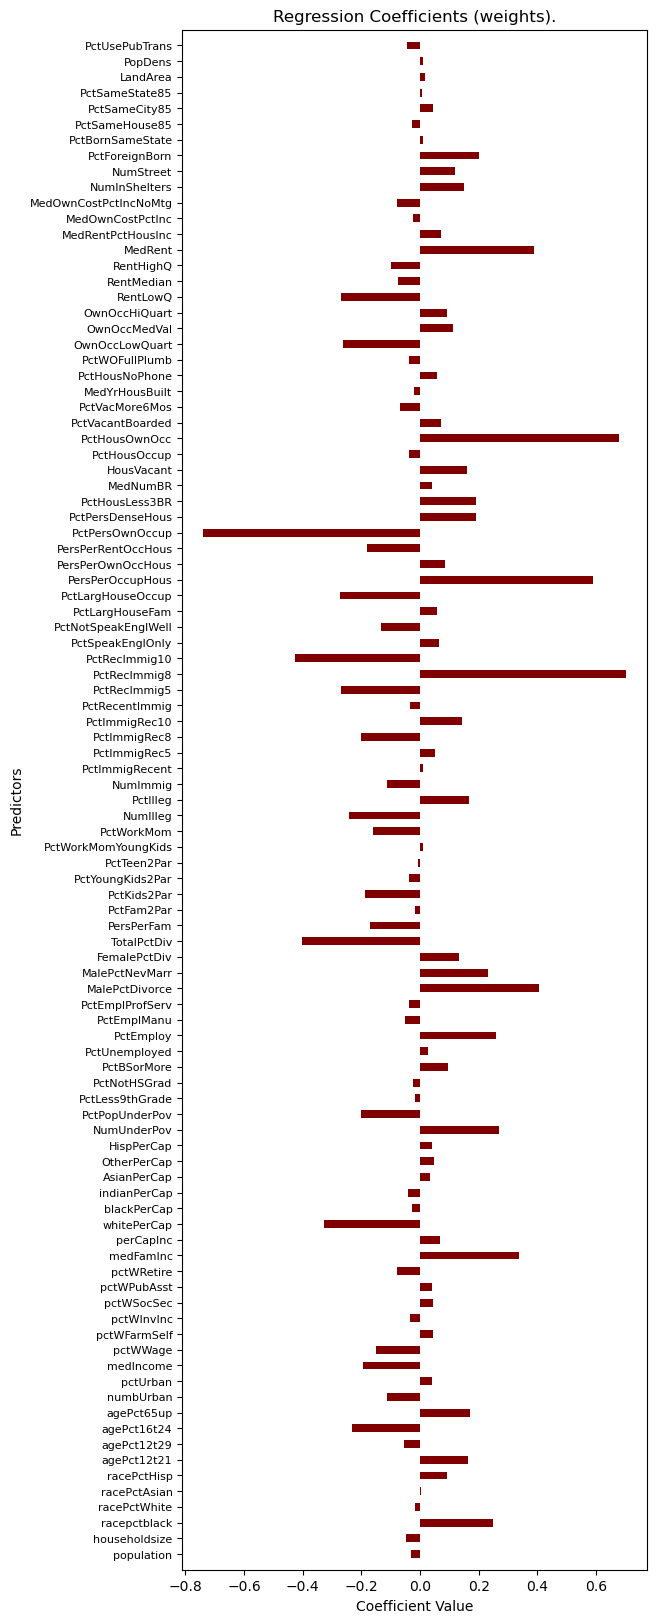

In [17]:
def plot_coEf(coEf, n_predictors, predictorNames):
    '''Plot regression coefficients (weights).'''
    coEf = np.array(coEf)
    #Convert coEf from data matrix to numpy array. 
    flattened_coEf = coEf.flatten()
    #Convert to a 1-dimensional array. 
    
    plt.figure(figsize=(6, 20))
    plt.barh(range(n_predictors), flattened_coEf, align='center', height=0.5, color = 'maroon')
    plt.yticks(range(n_predictors), predictorNames, fontsize=8)
    plt.title('Regression Coefficients (weights).')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Predictors")
    plt.ylim(-1, n_predictors)

plot_coEf(coEf, len(predictors.columns), predictors.columns)

#### Perform 10-fold cross-validation on the training data and compare the cross-validation RMSE to the training RMSE.

In [18]:
from sklearn.model_selection import KFold

def crossValidate(model, X, Y, n, verbose=False):
    '''10-fold cross validation function using def standGres.'''
    #Takes 'standRegres' regression model, training data, training target, number of fold, and returns RMSE of each fold.
    
    kfold = KFold(n)
    cvError = 0
    fold = 1
    #Initiate number of folds, cross validation error accumulator, and fold counter.
    for train, test in kfold.split(X):
        X_train = X[train]
        Y_train = Y[train]
        X_test = X[test]
        Y_test = Y[test]
        #For each fold, split train and test sets (data and target). 
        
        coEf = standRegres(X_train, Y_train)
        predTest = np.dot(X_test, coEf)
        #Get coefficient and generate prediction on the test set. 
        rmseTest = np.sqrt(mean_squared_error(predTest, Y_test))
        #Calculate RMSE test set. 
        
        if verbose:
            print(f'Fold {fold} RMSE: {rmseTest:.4f}')
        cvError += rmseTest
        #Adding rmseTest of each fold to cvError accumulator. 
        fold += 1
        #Update to next fold.
    return cvError / n

cvRMSE_Linear = crossValidate(standRegres, np.array(trainSet), np.array(trainTarget), 10, verbose=True)

Fold 1 RMSE: 0.1447
Fold 2 RMSE: 0.1397
Fold 3 RMSE: 0.1337
Fold 4 RMSE: 0.1358
Fold 5 RMSE: 0.1348
Fold 6 RMSE: 0.1332
Fold 7 RMSE: 0.1191
Fold 8 RMSE: 0.1211
Fold 9 RMSE: 0.1361
Fold 10 RMSE: 0.1469


In [19]:
print(f'RMSE on training: {rmseTrain:.4f}')
print(f'RMSE on 10-fold CV: {cvRMSE_Linear:.4f}')

RMSE on training: 0.1264
RMSE on 10-fold CV: 0.1345


c. Feature Selection: Use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a function that takes as input the training data, target variable, the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights. Next, plot the model's mean absolute error values on cross-validation relative to the percentage of selected features.

In [20]:
from sklearn.linear_model import LinearRegression
#Use the scikit-learn regression model from sklearn.linear_model.
linearModel = LinearRegression()
linearModel.fit(trainSet,trainTarget)

LinearRegression()

In [21]:
from sklearn import feature_selection
from sklearn.model_selection import cross_val_score

def featureSelection (X, Y, model):
    '''Perform feature selection using regression model given training data.'''
    '''Returns the optimal percentage of predictors.'''
    
    percentageList = range(1, 101, 5)
    #Generate a list of percentage for feature selection. 
    results = []
    for percentage in percentageList:
        featureSelect = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = percentage)
        #Selects the top-performing features based on preferred percentage of total features.
        
        X_train_featureSelect = featureSelect.fit_transform(X, Y)
        #Transform trainSet to only selected features. 
        
        scores = cross_val_score(model, X_train_featureSelect, Y, scoring="neg_mean_absolute_error", cv = 5)
        #Obtain cross validation score. Using k=5 and Mean Absolute Error for scoring to minimize all errors. 
        
        print(f'{percentage}%: {scores.mean():.4f}')
        results = np.append(results, scores.mean())
        #Append the average MAE score from each feature selection round. 
        
        optimalPercentage_index = np.where(results == results.max())[0][0]
        #Return the index of percentage with minimum MAE value (aka. maximum negative MAE value in this case).
        optimalPercentage = percentageList[optimalPercentage_index]
        optimalMAE = results[optimalPercentage_index]
    
    print('\n')
    print('List of most informative variables and their weights.')
    selectedFeatures = []
    for i in range(len(X.columns.values)):
        if featureSelect.get_support()[i]:
            selectedFeatures.append((X.columns.values[i], featureSelect.scores_[i]))
            #Get indices of each feature in training data, and assign corresponding featureSelect scores.

    sortedFeatures = sorted(selectedFeatures, key=lambda x: x[1], reverse=True)
    #Sort feature weight in descending order.
    
    max_lenFeature = max(len(feature) for feature, _ in sortedFeatures)
    #Get max length of among all features for printing alignment. 

    for feature, score in sortedFeatures:
        featureAligned = feature.ljust(max_lenFeature) #Left align.
        print(f'{featureAligned}: {score}')

    return optimalPercentage_index, optimalPercentage, optimalMAE, percentageList, results

In [22]:
optimalPercentage_index, optimalPercentage, optimalMAE, percentageList, results = featureSelection(trainSet,trainTarget,linearModel)
print('\n')
print(f'Optimal Percentage Index: {optimalPercentage_index} | Optimal Percentage: {optimalPercentage}% | Optimal MAE: {-optimalMAE:.4f}')

1%: -0.1129
6%: -0.0994
11%: -0.0990
16%: -0.0991
21%: -0.0975
26%: -0.0961
31%: -0.0948
36%: -0.0947
41%: -0.0944
46%: -0.0947
51%: -0.0950
56%: -0.0953
61%: -0.0957
66%: -0.0957
71%: -0.0958
76%: -0.0952
81%: -0.0954
86%: -0.0951
91%: -0.0953
96%: -0.0953


List of most informative variables and their weights.
PctKids2Par          : 1972.8040638663906
PctIlleg             : 1936.1208737826887
PctFam2Par           : 1657.8650169981222
racePctWhite         : 1412.507812392418
PctYoungKids2Par     : 1342.1736137875248
PctTeen2Par          : 1299.5351058427004
racepctblack         : 1074.8895092675332
pctWPubAsst          : 784.5706408092445
pctWInvInc           : 756.0149723312651
FemalePctDiv         : 704.7727390048349
TotalPctDiv          : 693.1378303822006
PctPersOwnOccup      : 630.760339373983
MalePctDivorce       : 602.7748935816077
PctPopUnderPov       : 578.8173652137684
PctUnemployed        : 533.9131521991873
PctVacantBoarded     : 507.63640854199105
PctHousNoPhone       : 5

#### Plot the model's mean absolute error values on cross-validation relative to the percentage of selected features.

Optimal number of predictors:39


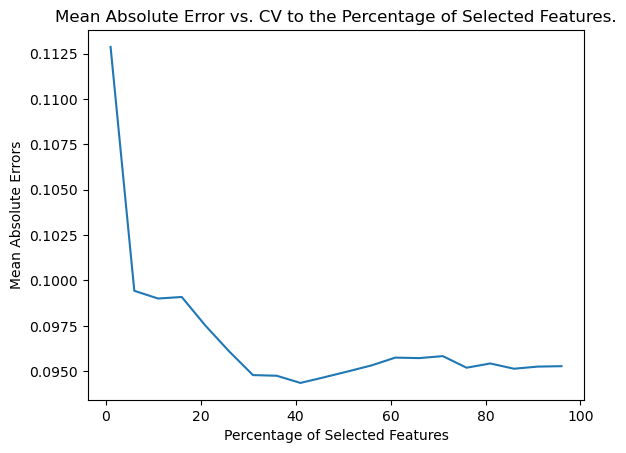

In [23]:
optimalNum_Predictors = int(optimalPercentage*len(trainSet.columns)/100)
print(f'Optimal number of predictors:{optimalNum_Predictors}')

#Plot percentile of features VS. cross-validation scores.
#Since we used negative MAE for scoring, we will switch sign for MAE values for plotting.
plt.figure()
plt.title('Mean Absolute Error vs. CV to the Percentage of Selected Features.')
plt.xlabel("Percentage of Selected Features")
plt.ylabel("Mean Absolute Errors")
plt.plot(percentageList, -results)
plt.show()

d. Using the original train-test split in part (a), perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. You should create a function that takes as input the data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). For each model, you should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha values, train the model on the full training data and evaluate it on the set-aside test data. Discuss your observations and conclusions, especially about the impact of alpha on bias-variance trade-off.

In [24]:
from sklearn.linear_model import Ridge, Lasso

def modelSelection(X, Y, paraNames, paraValues, model, k):
    '''Model Selection function perform k-fold cross validation for Ridge or Lasso regressions.'''
    
    X = np.array(X)
    Y = np.array(Y)
    
    trainRMSE = np.zeros(len(paraValues))
    cvRMSE = np.zeros(len(paraValues))
    #Initialize training and testing (cv) score arrays with zeros.
    
    for i, paraValue in enumerate(paraValues):
        #Iterate over parameter values.
        
        model.set_params(**{paraNames:paraValue})
        #Set classifier parameters.
        
        k_trainRMSE = np.zeros(k)
        k_testRMSE = np.zeros(k)
        #Initialize the k scores obtained for each fold.
        
        cv = KFold(n_splits=k, shuffle=True, random_state=0)
        #Create KFold cross validation.
        
        fold = 0
        for train, test in cv.split(X):
            model.fit(X[train], Y[train])
            predTrain = model.predict(X[train])
            predTest = model.predict(X[test])
            k_trainRMSE[fold] = np.sqrt(mean_squared_error(Y[train], predTrain))
            k_testRMSE[fold] = np.sqrt(mean_squared_error(Y[test], predTest))
            fold += 1
            #Fit the model in the corresponding fold and calculate the RMSE on train and test sets.
            
        trainRMSE[i] = np.mean(k_trainRMSE)
        cvRMSE[i] = np.mean(k_testRMSE)
        #Store the mean of the K-fold RMSE values.
        gap = cvRMSE[i] - trainRMSE[i]
        print(f'{paraNames}: {paraValue:.4f} | Train RMSE: {trainRMSE[i]:.5f}, CV RMSE: {cvRMSE[i]:.5f}, Gap: {gap:.5f}')
    
    bestAlpha_index_trainRMSE = np.argmin(trainRMSE)
    bestAlpha_index_cvRMSE = np.argmin(cvRMSE)
    print('\n')
    print(f'Best Alpha Index: Train RMSE: {bestAlpha_index_trainRMSE} | CV RMSE: {bestAlpha_index_cvRMSE}')
    #Get Alpha indicies of smallest RMSE values for train and cross validation RMSE. 

    #Plot the training and testing (cv) RMSE values.
    plt.plot(paraValues, trainRMSE, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(paraValues, cvRMSE, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(paraNames + " values")
    plt.ylabel("Root Mean Squared Error")
    plt.show()
    
    return trainRMSE, cvRMSE

#### Ridge Regression.

alpha: 0.0010 | Train RMSE: 0.12511, CV RMSE: 0.13628, Gap: 0.01117
alpha: 0.4091 | Train RMSE: 0.12597, CV RMSE: 0.13473, Gap: 0.00876
alpha: 0.8173 | Train RMSE: 0.12652, CV RMSE: 0.13450, Gap: 0.00798
alpha: 1.2254 | Train RMSE: 0.12695, CV RMSE: 0.13441, Gap: 0.00746
alpha: 1.6336 | Train RMSE: 0.12730, CV RMSE: 0.13436, Gap: 0.00706
alpha: 2.0417 | Train RMSE: 0.12761, CV RMSE: 0.13434, Gap: 0.00673
alpha: 2.4499 | Train RMSE: 0.12788, CV RMSE: 0.13434, Gap: 0.00646
alpha: 2.8580 | Train RMSE: 0.12812, CV RMSE: 0.13434, Gap: 0.00623
alpha: 3.2661 | Train RMSE: 0.12833, CV RMSE: 0.13435, Gap: 0.00602
alpha: 3.6743 | Train RMSE: 0.12853, CV RMSE: 0.13436, Gap: 0.00583
alpha: 4.0824 | Train RMSE: 0.12871, CV RMSE: 0.13438, Gap: 0.00567
alpha: 4.4906 | Train RMSE: 0.12888, CV RMSE: 0.13440, Gap: 0.00552
alpha: 4.8987 | Train RMSE: 0.12904, CV RMSE: 0.13442, Gap: 0.00538
alpha: 5.3069 | Train RMSE: 0.12919, CV RMSE: 0.13444, Gap: 0.00525
alpha: 5.7150 | Train RMSE: 0.12932, CV RMSE: 0.

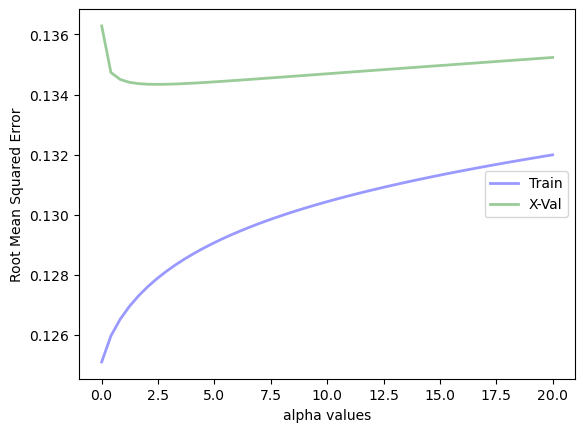

In [25]:
ridge = Ridge()
ridge.fit(trainSet, trainTarget)
alphaList = np.linspace(.001,20,50)
trainRMSE, cvRMSE = modelSelection(trainSet, trainTarget, 'alpha', alphaList, ridge, 5)

From the result above, train RMSE has the lowest RMSE at the first Alpha value, while cross validation has the lowest RMSE at the 6th Alpha value. With this, I will choose the middle Alpha value between these two thresholds to avoid either over or under fitting. I decided use the third Alpha value = 0.8173.

In [26]:
#Train the model on the full training data and evaluate it on the set-aside test data.
bestRidge = Ridge(alpha = alphaList[2])
bestRidge.fit(trainSet, trainTarget)

predTrain = bestRidge.predict(trainSet)
trainRMSE_Ridge = np.sqrt(mean_squared_error(predTrain, trainTarget))
predTest = bestRidge.predict(testSet)
testRMSE_Ridge = np.sqrt(mean_squared_error(predTest, testTarget))

print(f'Ridge Regression with best Alpha value: {alphaList[2]}')
print(f'RMSE on training: {trainRMSE_Ridge:.5f}')
print(f'RMSE on testing: {testRMSE_Ridge:.5f}')

Ridge Regression with best Alpha value: 0.8172857142857143
RMSE on training: 0.12725
RMSE on testing: 0.14330


#### Lasso Regression.

alpha: 0.0001 | Train RMSE: 0.12730, CV RMSE: 0.13470, Gap: 0.00741
alpha: 0.0011 | Train RMSE: 0.13366, CV RMSE: 0.13633, Gap: 0.00267
alpha: 0.0021 | Train RMSE: 0.13606, CV RMSE: 0.13796, Gap: 0.00190
alpha: 0.0032 | Train RMSE: 0.13818, CV RMSE: 0.13972, Gap: 0.00154
alpha: 0.0042 | Train RMSE: 0.14046, CV RMSE: 0.14195, Gap: 0.00150
alpha: 0.0052 | Train RMSE: 0.14295, CV RMSE: 0.14447, Gap: 0.00152
alpha: 0.0062 | Train RMSE: 0.14523, CV RMSE: 0.14654, Gap: 0.00131
alpha: 0.0072 | Train RMSE: 0.14704, CV RMSE: 0.14811, Gap: 0.00107
alpha: 0.0082 | Train RMSE: 0.14885, CV RMSE: 0.14975, Gap: 0.00090
alpha: 0.0093 | Train RMSE: 0.15067, CV RMSE: 0.15141, Gap: 0.00074
alpha: 0.0103 | Train RMSE: 0.15237, CV RMSE: 0.15305, Gap: 0.00068
alpha: 0.0113 | Train RMSE: 0.15417, CV RMSE: 0.15482, Gap: 0.00065
alpha: 0.0123 | Train RMSE: 0.15607, CV RMSE: 0.15672, Gap: 0.00065
alpha: 0.0133 | Train RMSE: 0.15811, CV RMSE: 0.15876, Gap: 0.00065
alpha: 0.0144 | Train RMSE: 0.16029, CV RMSE: 0.

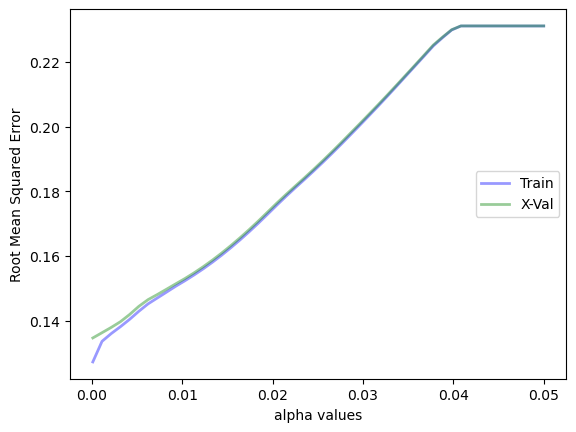

In [27]:
lasso = Lasso()
lasso.fit(trainSet, trainTarget)
alphaList = np.linspace(.0001, .05, 50)
trainRMSE, cvRMSE = modelSelection(trainSet, trainTarget, 'alpha', alphaList, lasso, 5)

From the result above, both train and cross validation have the lowest RMSE at the 1st Alpha value. We will fit the model using 1st Alpha value = 0.0001.

In [28]:
#Train the model on the full training data and evaluate it on the set-aside test data.
bestLasso = Lasso(alpha = alphaList[0])
bestLasso.fit(trainSet, trainTarget)

predTrain = bestLasso.predict(trainSet)
trainRMSE_Lasso = np.sqrt(mean_squared_error(predTrain, trainTarget))
predTest = bestRidge.predict(testSet)
testRMSE_Lasso = np.sqrt(mean_squared_error(predTest, testTarget))

print(f'Lasso Regression with best Alpha value: {alphaList[0]}')
print(f'RMSE on training: {trainRMSE_Lasso:.5f}')
print(f'RMSE on testing: {testRMSE_Lasso:.5f}')

Lasso Regression with best Alpha value: 0.0001
RMSE on training: 0.12816
RMSE on testing: 0.14330


#### Discuss your observations and conclusions, especially about the impact of alpha on bias-variance trade-off.

On training data, Linear regression give the smallest RMSE value of 0.1264. Ridge and Lasso regressions resulted higher RMSE of 0.12725 and 0.12816 , respectively; but not that significant. We can conclude that Linear regressions fit the training data better, while Ridge and Lasso regressions have more bias which yield slightly higher RMSE. 

Both Ridge and Lasso regression give the same RMSE for test data: 0.1433. This indicates both models perform equally on unseen data. Both Ridge and Lasso regressions apply tunning parameter (Alpha), which resulting the higher Alpha value, increase bias and decrease variance. Considering test validation RMSE is closed to training RMSE, we can conclud the overall performance of the two models are good. 

e. Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start by a creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [29]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#Since we're already split from the beginning, I will skip train-test split step.
scaler = StandardScaler()
scaler.fit(trainSet)
scaled_trainSet = scaler.transform(trainSet)
scaled_testSet = scaler.transform(testSet)
#Scale data by standard deviation.

In [30]:
sgdReg = SGDRegressor()
parameters = {'penalty': ['l2','l1'], 'alpha': np.linspace(.0001, 10, 100)}
gridSearch = GridSearchCV(sgdReg, parameters, verbose=1, cv=5)
%time _ = gridSearch.fit(scaled_trainSet, trainTarget)
print(f'Best parameters: {gridSearch.best_params_}')
print(f'Best score: {gridSearch.best_score_}')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Wall time: 10.4 s
Best parameters: {'alpha': 0.2021181818181818, 'penalty': 'l2'}
Best score: 0.6533789213689121


#### Using the best parameters, apply the model to the set-aside test data.

In [31]:
#Train the model on the full training data and evaluate it on the set-aside test data.
bestPara = gridSearch.best_params_
best_sdgReg = SGDRegressor(penalty = bestPara['penalty'], alpha = bestPara['alpha'])
best_sdgReg.fit(scaled_trainSet, trainTarget)
scaled_predTest = best_sdgReg.predict(scaled_testSet)
scaled_testRMSE = np.sqrt(mean_squared_error(scaled_predTest, testTarget))

print(f'RMSE on testing: {scaled_testRMSE:.5f}')

RMSE on testing: 0.14957


l1_ratio: 0.0000 | Train RMSE: 0.13058, CV RMSE: 0.13625, Gap: 0.00567
l1_ratio: 0.0101 | Train RMSE: 0.13073, CV RMSE: 0.13693, Gap: 0.00620
l1_ratio: 0.0202 | Train RMSE: 0.13107, CV RMSE: 0.13714, Gap: 0.00607
l1_ratio: 0.0303 | Train RMSE: 0.13262, CV RMSE: 0.13954, Gap: 0.00692
l1_ratio: 0.0404 | Train RMSE: 0.13041, CV RMSE: 0.13704, Gap: 0.00663
l1_ratio: 0.0505 | Train RMSE: 0.13053, CV RMSE: 0.13820, Gap: 0.00767
l1_ratio: 0.0606 | Train RMSE: 0.13130, CV RMSE: 0.13731, Gap: 0.00601
l1_ratio: 0.0707 | Train RMSE: 0.13132, CV RMSE: 0.13948, Gap: 0.00816
l1_ratio: 0.0808 | Train RMSE: 0.13131, CV RMSE: 0.13753, Gap: 0.00622
l1_ratio: 0.0909 | Train RMSE: 0.12968, CV RMSE: 0.13711, Gap: 0.00743
l1_ratio: 0.1010 | Train RMSE: 0.13111, CV RMSE: 0.13805, Gap: 0.00694
l1_ratio: 0.1111 | Train RMSE: 0.13171, CV RMSE: 0.13881, Gap: 0.00711
l1_ratio: 0.1212 | Train RMSE: 0.13016, CV RMSE: 0.13797, Gap: 0.00781
l1_ratio: 0.1313 | Train RMSE: 0.13045, CV RMSE: 0.13660, Gap: 0.00614
l1_rat

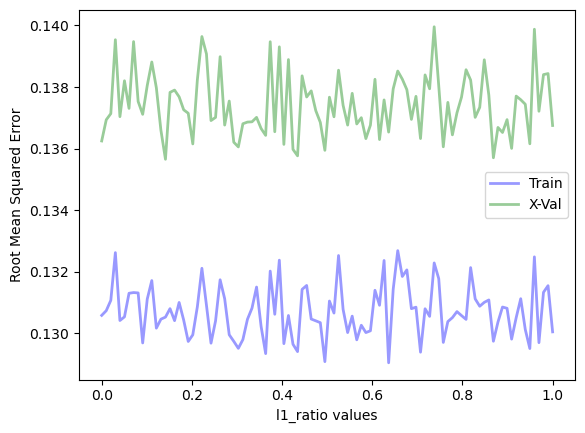

In [32]:
elast_sgdReg = SGDRegressor(penalty='elasticnet', l1_ratio=0.15)
l1_ratio = np.linspace(0, 1, 100)
trainRMSE, testRMSE = modelSelection(scaled_trainSet, trainTarget, 'l1_ratio', l1_ratio, elast_sgdReg, 5)

#### Train the model on the full training data and evaluate it on the set-aside test data.

In [33]:
best_l1_ratio = l1_ratio[np.argmin(testRMSE)]
#We will use the best l1_ratio correspond to lowest RMSE on test data.

best_sgdReg = SGDRegressor(penalty='elasticnet', l1_ratio=best_l1_ratio)
best_sgdReg.fit(scaled_trainSet, trainTarget)

best_predTest = best_sgdReg.predict(scaled_testSet)
testRMSE_SGD = np.sqrt(mean_squared_error(best_predTest, testTarget))

print(f'Ridge Regression with best l1_ratio value: {best_l1_ratio:.5f}')
print(f'RMSE on testing: {testRMSE_SGD:.5f}')

Ridge Regression with best l1_ratio value: 0.14141
RMSE on testing: 0.14924


#### Summary of your findings from the above experiments.

In [34]:
print(f'Cross Validation RMSE:')
print(f'Linear Regression: {cvRMSE_Linear:.5f}')
print(f'Ridge Regression: {testRMSE_Ridge:.5f}')
print(f'Lasso Regression: {testRMSE_Lasso:.5f}')
print(f'Stochastic Gradient Descent: {testRMSE_SGD:.5f}')

Cross Validation RMSE:
Linear Regression: 0.13451
Ridge Regression: 0.14330
Lasso Regression: 0.14330
Stochastic Gradient Descent: 0.14924


Just within Stochastic Gradient Descent regression, the RMSE on testing without eleasticnet is 0.14957, and RMSE using elasticnet is slightly lower at 0.14924. Which are not much different considering it is more expensive to run model with elasticnet.
On overall, using cross validation RMSE, there are not much different between the models. RMSE starts to varies in the third decimal. I also run the notebook several times with different seed values for train-test split, which in some scenarios, other regression model performs better. I would conclude given current seed value = 33, if we need to chose one model to move forward it would be Linear Regression since it yields the lowest RMSE. 